#1. **환경 설정**
이 단계에서는 필요한 라이브러리를 설치하고, Kaggle API를 설정합니다.

In [ ]:
# 필요한 라이브러리 설치
!pip install lobe[all]
!pip install google-cloud-vision opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 44.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing i

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.9/486.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 28.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.24.0 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorflow 2.8.4 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.0 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 5.29.0 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.8.4 which is incompatible.


In [ ]:
!pip uninstall protobuf -y
!pip install protobuf==3.20.*

Found existing installation: protobuf 5.29.0
Uninstalling protobuf-5.29.0:
  Successfully uninstalled protobuf-5.29.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
pandas-gbq 0.24.0 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorflow 2.8.4 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.8.4 which is incompatible.


In [ ]:
# Kaggle API 설정
from google.colab import files
import os

if not os.path.exists("~/.kaggle"):
    uploaded = files.upload()  # kaggle.json 업로드
    kaggle_json_path = "kaggle.json"
    if kaggle_json_path in uploaded:
        os.makedirs("~/.kaggle", exist_ok=True)
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
        print("Kaggle API 설정 완료!")
    else:
        print("kaggle.json 파일을 업로드하세요.")

Saving kaggle.json to kaggle.json
cp: cannot create regular file '/root/.kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Kaggle API 설정 완료!


#2. **Kaggle 데이터셋 다운로드**
여기서는 Kaggle에서 모델 데이터를 다운로드하고, 로컬 디렉토리에 압축을 풉니다.

In [ ]:
# Kaggle 데이터셋 다운로드 (조건부)
model_dataset_path = "/content/coin_dataset"
if not os.path.exists(model_dataset_path):
    print("모델 다운로드 중...")
    !kaggle datasets download -d gauravduttakiit/coin-currency-identification-mobilenet-v2
    !unzip coin-currency-identification-mobilenet-v2.zip -d /content/coin_dataset
else:
    print("모델 데이터셋이 이미 존재합니다!")


모델 다운로드 중...
Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/coin-currency-identification-mobilenet-v2
License(s): unknown
 95% 14.0M/14.7M [00:00<00:00, 45.0MB/s]
100% 14.7M/14.7M [00:00<00:00, 49.7MB/s]
Archive:  coin-currency-identification-mobilenet-v2.zip
  inflating: /content/coin_dataset/train TensorFlow/train TensorFlow/example/README.md  
  inflating: /content/coin_dataset/train TensorFlow/train TensorFlow/example/requirements.txt  
  inflating: /content/coin_dataset/train TensorFlow/train TensorFlow/example/tf_example.py  
  inflating: /content/coin_dataset/train TensorFlow/train TensorFlow/labels.txt  
  inflating: /content/coin_dataset/train TensorFlow/train TensorFlow/saved_model.pb  
  inflating: /content/coin_dataset/train TensorFlow/train TensorFlow/signature.json  
  inflating: /content/coin_dataset/train TensorFlow/train TensorFlow/variables/variables.data-00000-of-00001  
  inflating: /content/coin_dataset/train TensorFlow/train TensorFlow/variables/vari

#3. **모델 로드**
모델을 불러옵니다. Lobe 라이브러리를 사용하여 이미 학습된 모델을 로드합니다.

In [ ]:
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"
from lobe import ImageModel

# 모델 로드
model_path = "/content/coin_dataset/train TensorFlow/train TensorFlow/"
if os.path.exists(model_path):
    model = ImageModel.load(model_path)
    print("모델 로드 완료!")
else:
    print(f"모델 경로가 존재하지 않습니다: {model_path}")


모델 로드 완료!


#4. **화폐 정보 매핑**
화폐의 국가, 이름, 통화 코드를 사전에 정의합니다.

In [ ]:
# 화폐 정보 매핑
currency_mapping = {
    "yen_coins": {"code": "JPY", "country": "Japan", "name": "엔화"},
    "china_coins": {"code": "CNY", "country": "China", "name": "위안화"},
    "indian_coins": {"code": "INR", "country": "India", "name": "루피"},
    "euro_coins": {"code": "EUR", "country": "Europe", "name": "유로"},
    "us_coins": {"code": "USD", "country": "United States", "name": "달러"},
    "peso_coins": {"code": "MXN", "country": "Mexico", "name": "페소"},
}


#5. **새로운 이미지 업로드**
분석할 동전 이미지를 업로드합니다.

In [ ]:
# 새로운 이미지 업로드
print("새로운 이미지 업로드 중...")
uploaded = files.upload()  # 새로운 이미지 업로드
uploaded_file_path = list(uploaded.keys())[0]  # 업로드된 첫 번째 파일 경로
print(f"업로드된 파일: {uploaded_file_path}")


새로운 이미지 업로드 중...


Saving japanfinal.png to japanfinal.png
업로드된 파일: japanfinal.png


#6. **업로드된 이미지 확인**
업로드된 이미지를 시각화합니다.

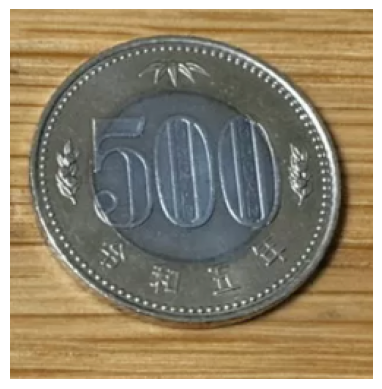

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 열기
pil_img = Image.open(uploaded_file_path)

# 이미지 보기
plt.imshow(pil_img)
plt.axis("off")  # 축 제거
plt.show()


#7. **화폐 예측**
모델을 사용하여 이미지가 어느 국가의 화폐인지 예측합니다.

In [ ]:
# 예측
try:
    prediction_result = model.predict_from_file(uploaded_file_path)
    print(f"예측된 라벨: {prediction_result.prediction}")
except Exception as e:
    print(f"예측 실패: {uploaded_file_path}, 오류: {e}")


예측된 라벨: yen_coins


#8. **숫자 텍스트 추출**
Google Cloud Vision API를 사용하여 이미지에서 숫자를 추출합니다.

In [ ]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

# 파일 확인
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving ardent-spot-438907-t8-617214abef33.json to ardent-spot-438907-t8-617214abef33.json
Uploaded file: ardent-spot-438907-t8-617214abef33.json


In [ ]:
import os
import re

# 업로드한 서비스 계정 JSON 파일을 사용하여 환경 변수를 설정.
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "ardent-spot-438907-t8-617214abef33.json"

# Google Cloud Vision API 사용
from google.cloud import vision
client = vision.ImageAnnotatorClient()

# Google Cloud Vision API로 이미지 분석
with open(uploaded_file_path, 'rb') as image_file:
    content = image_file.read()
    image = vision.Image(content=content)

# 이미지에서 텍스트(지폐 정보) 추출
response = client.text_detection(image=image)
texts = response.text_annotations

# 숫자 필터링
numbers = [text.description for text in texts if re.fullmatch(r"\d+", text.description)]
print("추출된 숫자:", numbers)


추출된 숫자: ['500', '500']


#9. **환율 정보 가져오기**
Open Exchange Rates API를 사용하여 실시간 환율을 가져옵니다.

In [ ]:
import requests

# Open Exchange Rates API 정보
app_id = "148f4e30628b419b9a6e30ea560c87b1"  # API 키
base_url = f"https://openexchangerates.org/api/latest.json?app_id={app_id}"

# API 호출
response = requests.get(base_url)

# 환율 확인용 통화 코드
currency_codes = {
    "SEK": "Sweden",
    "JPY": "Japan",
    "CNY": "China",
    "EUR": "Europe",
    "AUD": "Australia",
    "RUB": "Russia",
    "INR": "India",
    "MNT": "Mongolia",
    "USD": "United States",  # 미국 달러 추가
    "KRW": "Korea"
}

# 데이터 확인
if response.status_code == 200:
    data = response.json()

    usd_to_krw = data['rates']['KRW']  # USD에서 KRW로의 환율

    # 각 나라의 통화를 KRW로 변환하여 출력
    for currency_code, country_name in currency_codes.items():
        if currency_code in data['rates']:
            currency_to_krw = usd_to_krw / data['rates'][currency_code]  # 각 나라의 통화에서 KRW로 변환
            print(f"Current {country_name} ({currency_code}) to KRW exchange rate: {currency_to_krw:.2f}")
        else:
            print(f"환율 정보를 가져올 수 없습니다: {currency_code}")
else:
    print("환율 정보를 가져오지 못했습니다.")


Current Sweden (SEK) to KRW exchange rate: 128.00
Current Japan (JPY) to KRW exchange rate: 9.32
Current China (CNY) to KRW exchange rate: 192.71
Current Europe (EUR) to KRW exchange rate: 1476.18
Current Australia (AUD) to KRW exchange rate: 908.20
Current Russia (RUB) to KRW exchange rate: 13.03
Current India (INR) to KRW exchange rate: 16.50
Current Mongolia (MNT) to KRW exchange rate: 0.41
Current United States (USD) to KRW exchange rate: 1395.52
Current Korea (KRW) to KRW exchange rate: 1.00


#10. **최종 결과 출력**
화폐의 국가, 금액, 원화 가치를 계산하고 출력합니다.

In [ ]:
# 결과 출력
if prediction_result and prediction_result.prediction in currency_mapping:
    currency_info = currency_mapping[prediction_result.prediction]
    print("\n===== 결과 =====")
    print(f"화폐 국가: {currency_info['country']}")
    print(f"화폐 이름: {currency_info['name']}")

    if numbers:
        amount = int(numbers[0])
        print(f"금액: {amount} {currency_info['name']}")

        # 환율 동적 계산
        currency_code = currency_info['code']
        if currency_code in data['rates']:
            currency_to_krw = usd_to_krw / data['rates'][currency_code]
            krw_amount = amount * currency_to_krw
            print(f"현재 원화 가치: {krw_amount:.2f} KRW")
        else:
            print(f"{currency_code}에 대한 환율 정보를 가져올 수 없습니다.")
    else:
        print("이미지에서 금액을 감지하지 못했습니다.")
else:
    print("화폐 정보를 확인할 수 없습니다.")



===== 결과 =====
화폐 국가: Japan
화폐 이름: 엔화
금액: 500 엔화
현재 원화 가치: 4659.03 KRW


#11. **스마트폰 UI 출력**

In [ ]:
from IPython.core.display import display, HTML

# 예측된 데이터 예시 (동적으로 할당된 값 사용)
if prediction_result and prediction_result.prediction in currency_mapping:
    currency_info = currency_mapping[prediction_result.prediction]
    currency_country = currency_info['country']
    currency_name = currency_info['name']
    currency_symbol = {
        "JPY": "¥",
        "CNY": "¥",
        "EUR": "€",
        "USD": "$",
        "INR": "₹",
        "KRW": "₩",
        "SEK": "kr",
        "RUB": "₽",
        "MNT": "₮"
    }.get(currency_info['code'], "")
    amount = int(numbers[0]) if numbers else 0

    # 원화 가치 계산
    krw_amount = amount * currency_to_krw
else:
    print("화폐 정보를 확인할 수 없습니다.")
    currency_country = None
    currency_name = None
    amount = None
    krw_amount = None

# 스마트폰 UI 스타일 HTML
if currency_country and currency_name and krw_amount is not None:
    smartphone_ui_template = f"""
    <div style="max-width: 375px; margin: 20px auto; font-family: 'Arial', sans-serif; border: 1px solid #ddd; border-radius: 20px; overflow: hidden; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
        <!-- Header -->
        <div style="background-color: #f8f9fa; padding: 15px; text-align: center; border-bottom: 1px solid #e0e0e0;">
            <h3 style="margin: 0; color: #333;">화폐메라</h3>
        </div>
        <!-- Content -->
        <div style="padding: 20px; text-align: left; background-color: #ffffff;">
            <p style="font-size: 14px; color: #888; margin: 0 0 10px;">촬영하신 화폐는</p>
            <div style="background-color: #ffe9e9; border-radius: 15px; padding: 15px; box-shadow: inset 0 2px 5px rgba(0, 0, 0, 0.1);">
                <p style="font-size: 16px; color: #333; margin: 5px 0;"><b>화폐의 국가:</b> <span style="color: #e74c3c;">{currency_country}</span></p>
                <p style="font-size: 16px; color: #333; margin: 5px 0;"><b>금액:</b> <span style="color: #3498db;">{currency_symbol}{amount}</span></p>
                <p style="font-size: 16px; color: #333; margin: 5px 0;"><b>현재 원화 가치:</b> <span style="color: #2ecc71;">{krw_amount:.2f}원</span></p>
            </div>
            <div style="text-align: center; margin-top: 15px;">
                <button style="background-color: #e74c3c; color: white; border: none; border-radius: 10px; padding: 10px 20px; font-size: 14px; cursor: pointer;">다시 찍기</button>
            </div>
        </div>
    </div>
    """
    display(HTML(smartphone_ui_template))
else:
    print("결과를 렌더링할 수 없습니다.")
